In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# ---------- 自定义函数 begin ---------- #
def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        data = np.fromfile(f, dtype=np.uint8, count=-1)     # -1 表示全部读取
    # 前16个字节是Magic Number和 Number of Images
    return data[16:].reshape(-1, 28*28) / 255.0


def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        data = np.fromfile(f, dtype=np.uint8, count=-1)     # -1 表示全部读取
    # 前8个字节是Magic Number
    return data[8:]


# 初始化权重
def initialize_weights(input_variables_size, weights_init_val=None):
    if weights_init_val is not None:
        weight_i = np.ones(input_variables_size) * weights_init_val
        weight_0 = np.ones(1) * weights_init_val
    else:
        weight_i = np.random.rand(input_variables_size)
        weight_0 = np.random.rand(1)
    return weight_i, weight_0


# 训练函数
def train(x, y, weights_init_val=None, learning_rate=0.01, epochs=100, stopping_threshold=0.018):
    input_variables_size = len(x[0])
    weight_i, weight_0 = initialize_weights(input_variables_size, weights_init_val)

    errors = []

    for epoch in range(epochs):
        error = 0
        for xi, target in zip(x, y):
            
            # 运行时间太长，修改为以下写法
            # dot_product = sum(xi_j * weight_i_j for xi_j, weight_i_j in zip(xi, weight_i))
            dot_product = np.sum(xi * weight_i)

            prediction = np.sign(dot_product + weight_0)
            update = learning_rate * (target - prediction)
            weight_i += update * xi
            weight_0 += update
            error += int(update.item() != 0.0)

        errors.append(error / len(y))       # 训练集的样本个数

        if error / len(y) < stopping_threshold:
            break

    return errors, weight_i, weight_0


# 使用训练好的参数进行预测
def predict_with_parameters(x, weight_i, weight_0):
    predictions = np.sign(np.dot(x, weight_i) + weight_0)
    return predictions


# 计算错误率
def calculate_error_rate(predictions, actual_labels):
    incorrect_samples = np.sum(predictions != actual_labels)
    error_rate = incorrect_samples / len(actual_labels)
    return error_rate
# ---------- 自定义函数 end   ---------- #

In [15]:
train_images_file = 'train_data/train-images.idx3-ubyte'
train_labels_file = 'train_data/train-labels.idx1-ubyte'
test_images_file = 'test_data/t10k-images.idx3-ubyte'
test_labels_file = 'test_data/t10k-labels.idx1-ubyte'

train_images_array = load_mnist_images(train_images_file)
train_labels_array = load_mnist_labels(train_labels_file)
test_images_array = load_mnist_images(test_images_file)
test_labels_array = load_mnist_labels(test_labels_file)

train_label = np.where(train_labels_array == 6, 1, -1)
test_label = np.where(test_labels_array == 6, 1, -1)

In [16]:
# 实验1: 不同初始权重
errors1, final_weight_i_1, final_weight_0_1 = \
    train(train_images_array, train_label, weights_init_val=0, learning_rate=0.01, stopping_threshold=0.017)
errors2, final_weight_i_2, final_weight_0_2 = \
    train(train_images_array, train_label, weights_init_val=1, learning_rate=0.01, stopping_threshold=0.017)

# 实验2: 不同训练速率
errors3, final_weight_i_3, final_weight_0_3 = \
    train(train_images_array, train_label, weights_init_val=1, learning_rate=0.001, stopping_threshold=0.017)
errors4, final_weight_i_4, final_weight_0_4 = \
    train(train_images_array, train_label, weights_init_val=1, learning_rate=0.08, stopping_threshold=0.017)


Text(0.5, 1.0, 'Experiment 2: Zero Initial Weights - Learning Rate: 0.08')

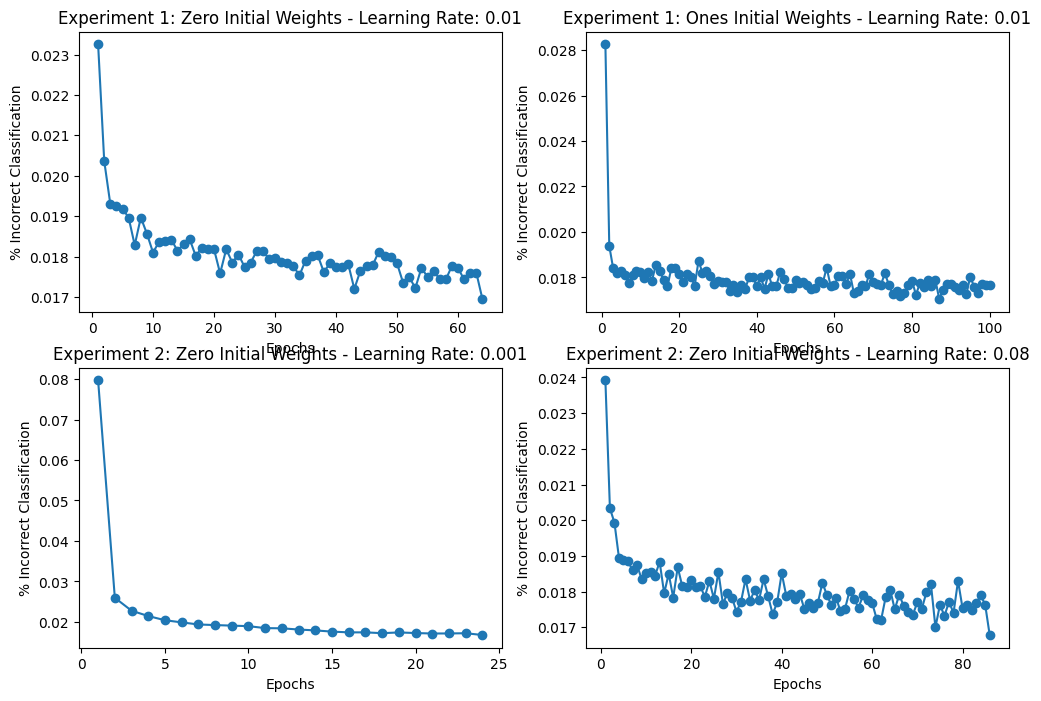

In [17]:
# 绘制训练集的错误率随时间变化的图表
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(range(1, len(errors1) + 1), errors1, marker='o')
plt.xlabel('Epochs')
plt.ylabel('% Incorrect Classification')
plt.title('Experiment 1: Zero Initial Weights - Learning Rate: 0.01')

plt.subplot(2, 2, 2)
plt.plot(range(1, len(errors2) + 1), errors2, marker='o')
plt.xlabel('Epochs')
plt.ylabel('% Incorrect Classification')
plt.title('Experiment 1: Ones Initial Weights - Learning Rate: 0.01')

plt.subplot(2, 2, 3)
plt.plot(range(1, len(errors3) + 1), errors3, marker='o')
plt.xlabel('Epochs')
plt.ylabel('% Incorrect Classification')
plt.title('Experiment 2: Zero Initial Weights - Learning Rate: 0.001')

plt.subplot(2, 2, 4)
plt.plot(range(1, len(errors4) + 1), errors4, marker='o')
plt.xlabel('Epochs')
plt.ylabel('% Incorrect Classification')
plt.title('Experiment 2: Zero Initial Weights - Learning Rate: 0.08')

In [18]:
# 在测试集上验证不同实验的错误率
predict_label_1 = predict_with_parameters(test_images_array, final_weight_i_1, final_weight_0_1)
predict_label_2 = predict_with_parameters(test_images_array, final_weight_i_2, final_weight_0_2)
predict_label_3 = predict_with_parameters(test_images_array, final_weight_i_3, final_weight_0_3)
predict_label_4 = predict_with_parameters(test_images_array, final_weight_i_4, final_weight_0_4)
error_rate_1 = calculate_error_rate(predict_label_1, test_label)
error_rate_2 = calculate_error_rate(predict_label_2, test_label)
error_rate_3 = calculate_error_rate(predict_label_3, test_label)
error_rate_4 = calculate_error_rate(predict_label_4, test_label)

print("Experiment 1 Error Rate (Zero Initial Weights):", error_rate_1)
print("Experiment 1 Error Rate (Ones Initial Weights):", error_rate_2)
print("Experiment 2 Error Rate (Learning Rate: 0.001):", error_rate_3)
print("Experiment 2 Error Rate (Learning Rate: 0.08):", error_rate_4)

Experiment 1 Error Rate (Zero Initial Weights): 0.0185
Experiment 1 Error Rate (Ones Initial Weights): 0.0164
Experiment 2 Error Rate (Learning Rate: 0.001): 0.0192
Experiment 2 Error Rate (Learning Rate: 0.08): 0.0168
